## Diabetes identification and prediction

### Introduction
Diabetes is a chronic metabolic disease characterized by elevated blood sugar levels and is one of the focuses of chronic disease prevention and health management. As the prevalence of diabetes increases, effective prediction and diagnosis are critical for timely intervention and management. The disease can be diagnosed by using recent advances in machine learning methods(Daghistani et al., 2020), where supervised learning algorithms are used to test the accuracy of diabetes diagnosis(Palimkar et al., 2022). Deep learning models with various features combined with generalized linear models and deep feedforward neural networks are also used to predict diabetes(Alehegn et al., 2019).

In this study, we explored the predictive power of various machine learning models in identifying diabetes risk factors using a dataset containing key variables such as blood pressure, skin thickness, insulin levels, BMI and age, with the aim of developing a Diabetes diagnosis and prediction model with remarkable accuracy.

### Research question
The main purpose of this study was to investigate factors influencing the onset of diabetes and the effectiveness of different machine learning models in predicting diabetes based on a set of clinical and demographic characteristics. Specifically, we attempt to answer the following research questions:

Which factor has the greatest impact on diabetes risk? And using existing data sets, which machine learning model performs best at predicting diabetes risk factors?

In [142]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
import statistics 
import seaborn as sns
from IPython.display import display, Math, Latex, display_latex
import plotly.express as px
import pylab
import pandas as pd
import numpy as np
import sklearn
# preprocessors
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, validation_curve
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# feature importance
import rfpimp

# make the plots (graphs) a little wider by default
pylab.rcParams['figure.figsize'] = (10., 8.)
sns.set(font_scale=1.5)
sns.set_style("white")

### Presentation of data
#### Import Data
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on diagnostic measurements included in the dataset(Smith et al., 1988). 

In [143]:
df = pd.read_csv('https://raw.githubusercontent.com/ofelia-ff/data_science/main/diabetes.csv', low_memory=False)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Explore Data

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Types of variables:

In diabetes, there is only one data type: numerical (including int64 and float64).
Here is a list of the variables in the dataset:
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- Diabetespedigreefunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [145]:
summary=df.describe().round(2)  # generate summary statistics, and round everything to 2 decimal degrees
summary=summary.T #.T transposes the table (rows become columns and vice versa)
summary

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.0,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.0,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.0,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.0,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00


Create a summary statistics table. Gain a qualitative understanding of the data before cleaning and analyzing it.

In [146]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Check for NaN values in the data. The running results show that there are no NaN values in the data set.

In [147]:
# distribution of outcome variable
df.Outcome.value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

Looking at the data, we can see that the variable "Outcome" is categorical data and has only two values 1 and 0. Calculate the distribution of a variable and express it as a percentage.

<Axes: xlabel='Age', ylabel='Density'>

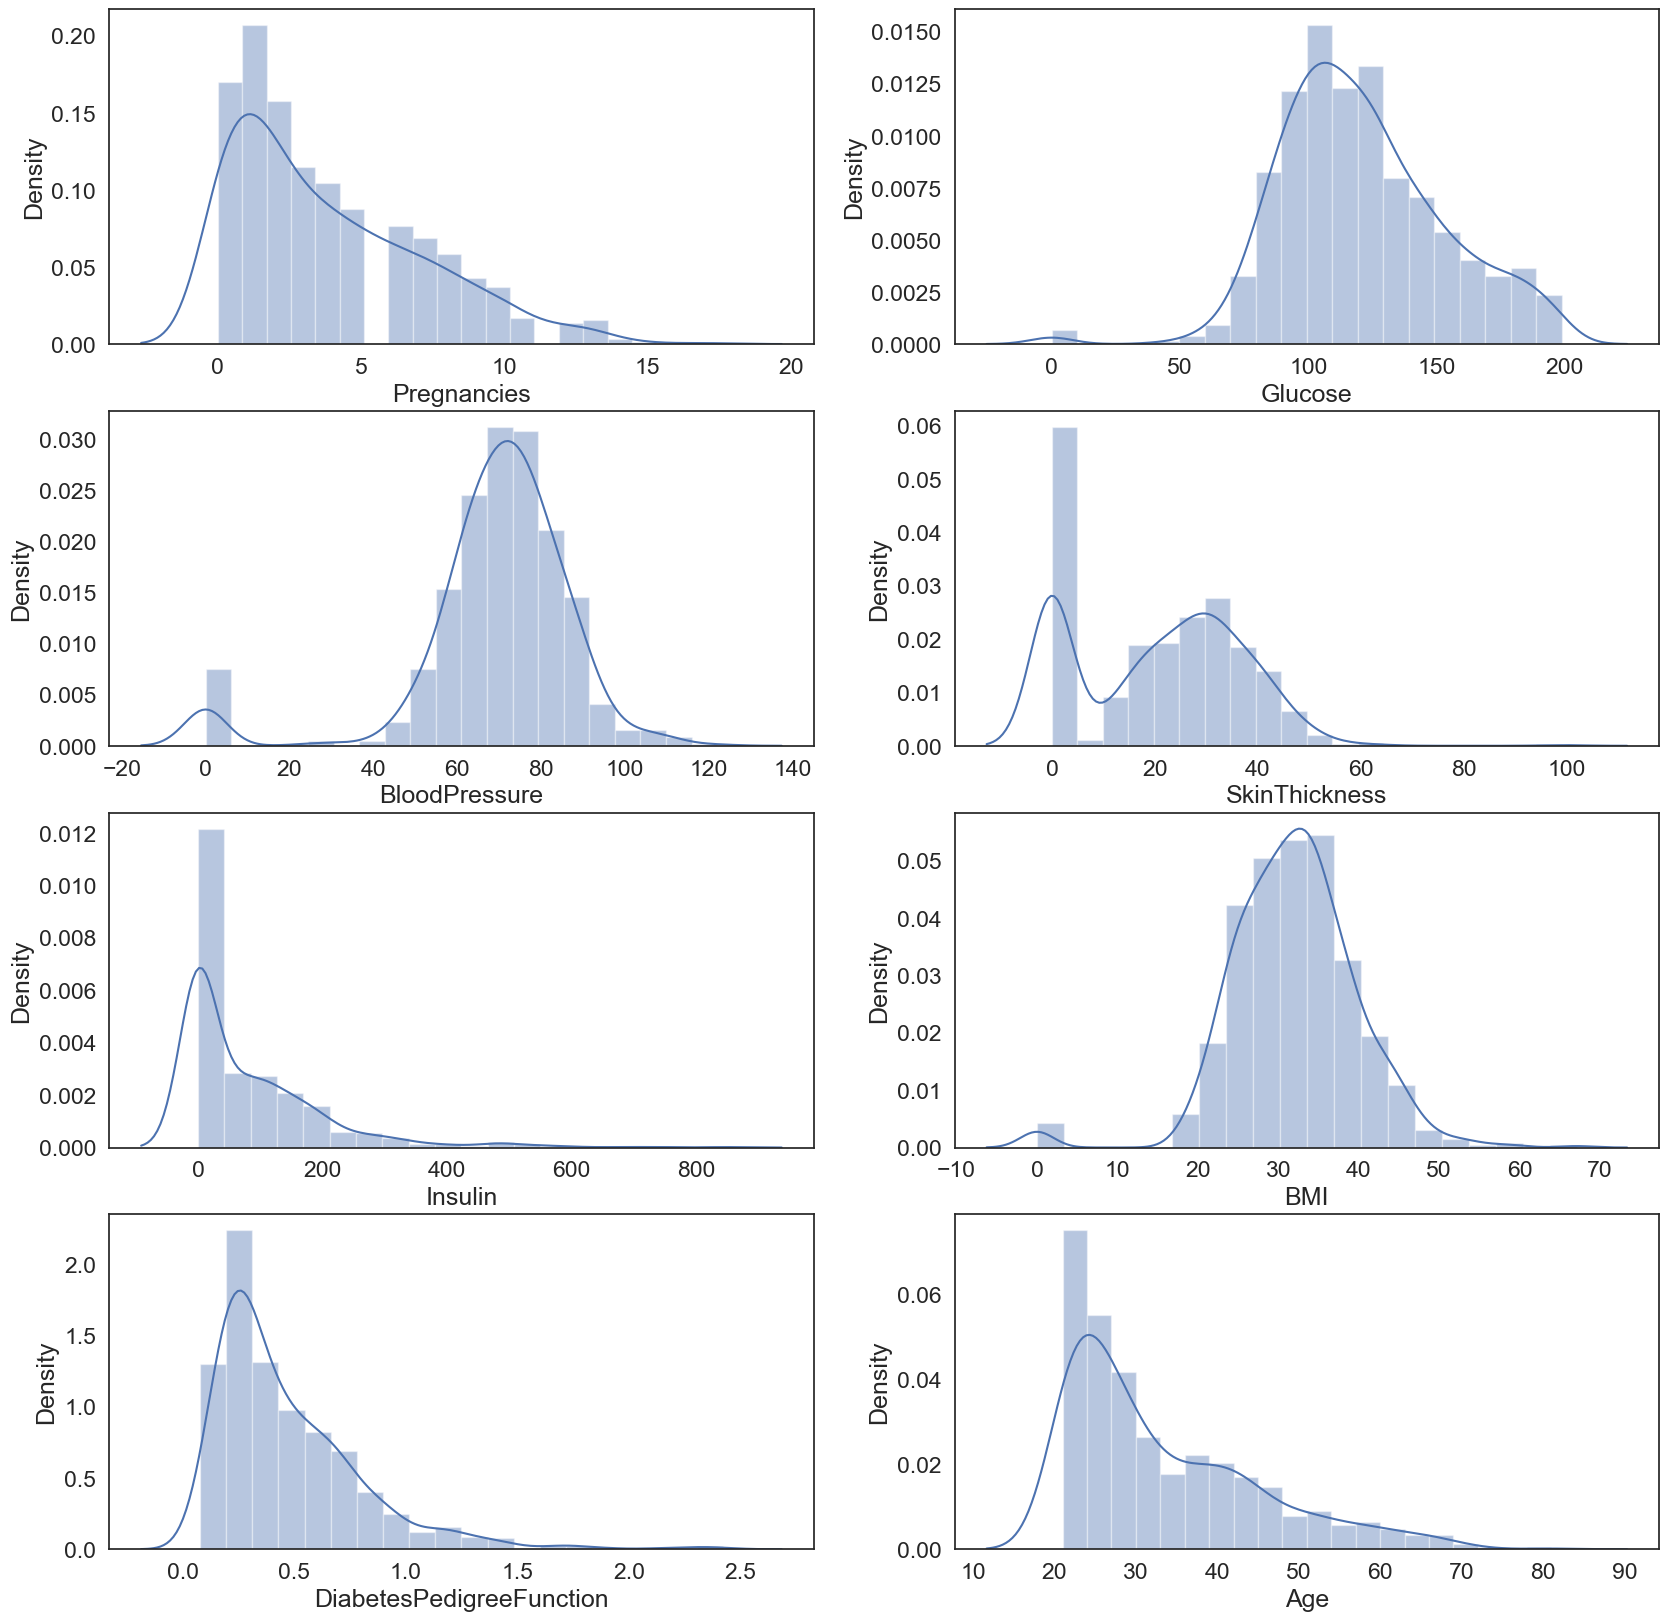

In [148]:
fig,ax = plt.subplots(4,2, figsize=(20,20))
sns.distplot(df.Pregnancies, bins=20, ax=ax[0,0])
sns.distplot(df.Glucose, bins=20, ax=ax[0,1])
sns.distplot(df.BloodPressure, bins=20, ax=ax[1,0])
sns.distplot(df.SkinThickness, bins=20, ax=ax[1,1])
sns.distplot(df.Insulin, bins=20, ax=ax[2,0])
sns.distplot(df.BMI, bins=20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3,0])
sns.distplot(df.Age, bins=20, ax=ax[3,1])

Plot the distribution of other features except the variable "Outcome", which correspond to different columns in the data frame.
Through these distribution diagrams, we can intuitively understand the data distribution of each feature, including central trend, degree of dispersion, etc., which is helpful for further data analysis and feature engineering.

The data is desired to normally distributed as most of machine learning algorithms require the data to be normally distributed.
The count number distribution looks good but not ideally following normal distribution, there are significant discrete values for variables BloodPressure and SkinThickness.

In [149]:
def filter_outliers(var):
    q1 = var.quantile(0.25) # calculate the first quartile
    q3 = var.quantile(0.75) # calculate the third quartile
    iqr = q3 - q1 # calculate the interquartile range
    low = q1 - 3*iqr # calculate the lower bound
    high = q3 + 3*iqr # calculate the upper bound
    filtered = df[(var > low) & (var < high)] # filter  the values that are within the bounds
    dropped_observations= len(var)-len(filtered) # calculate the number of observations that were dropped

    print('Dropped {} observations'.format(dropped_observations))
    return  filtered

df = filter_outliers(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']])
 # filter outliers

Dropped 0 observations


Define a function called filter_outliers that identifies and filters outliers for variables in the data frame and prints the number of removed outliers.
No values are filtered according to the results shown.

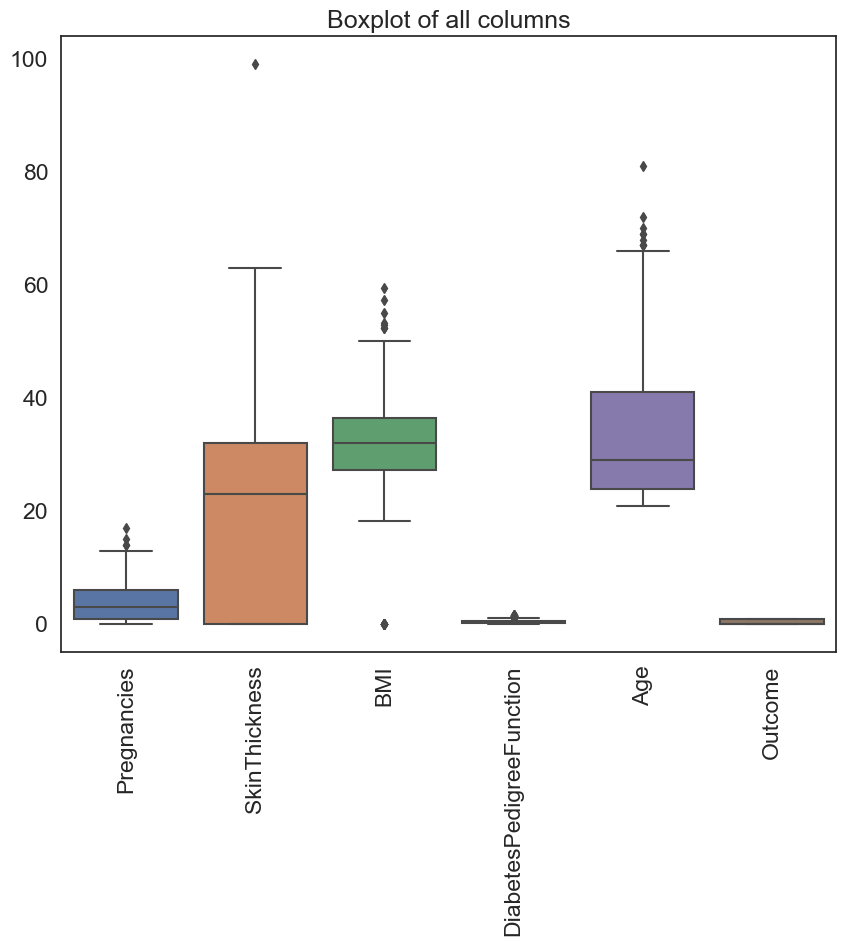

In [150]:
# Box plot, can be used to display outliers
sns.boxplot(data=df[['Pregnancies', 'SkinThickness','BMI','DiabetesPedigreeFunction','Age','Outcome']])
plt.title('Boxplot of all columns')
plt.xticks(rotation=90)  
plt.show()

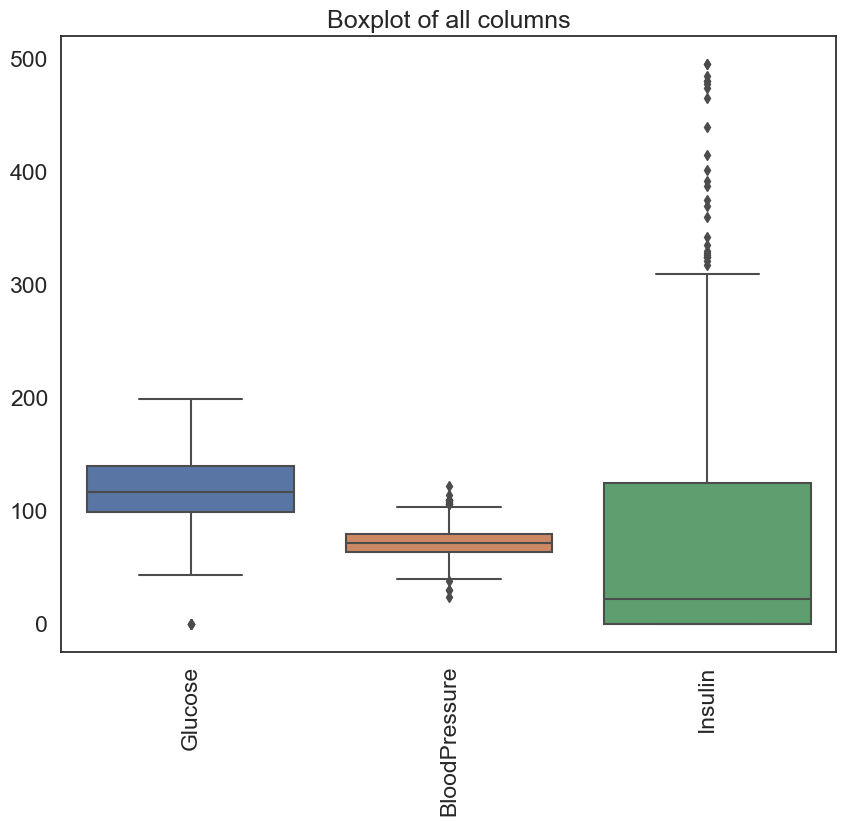

In [151]:
sns.boxplot(data=df[['Glucose', 'BloodPressure', 'Insulin']])
plt.title('Boxplot of all columns')
plt.xticks(rotation=90)  
plt.show()

According to the numerical value of the variables, box plots are drawn in groups to visually check the central trend, dispersion and outliers of the data.
As can be seen from the figure, there are still outliers in the data.

In [152]:
df = df.dropna()
# Define the dependent variable (y) and independent variables (X)
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df[['Outcome']]

Text(0.5, 1.0, 'Correlation Matrix')

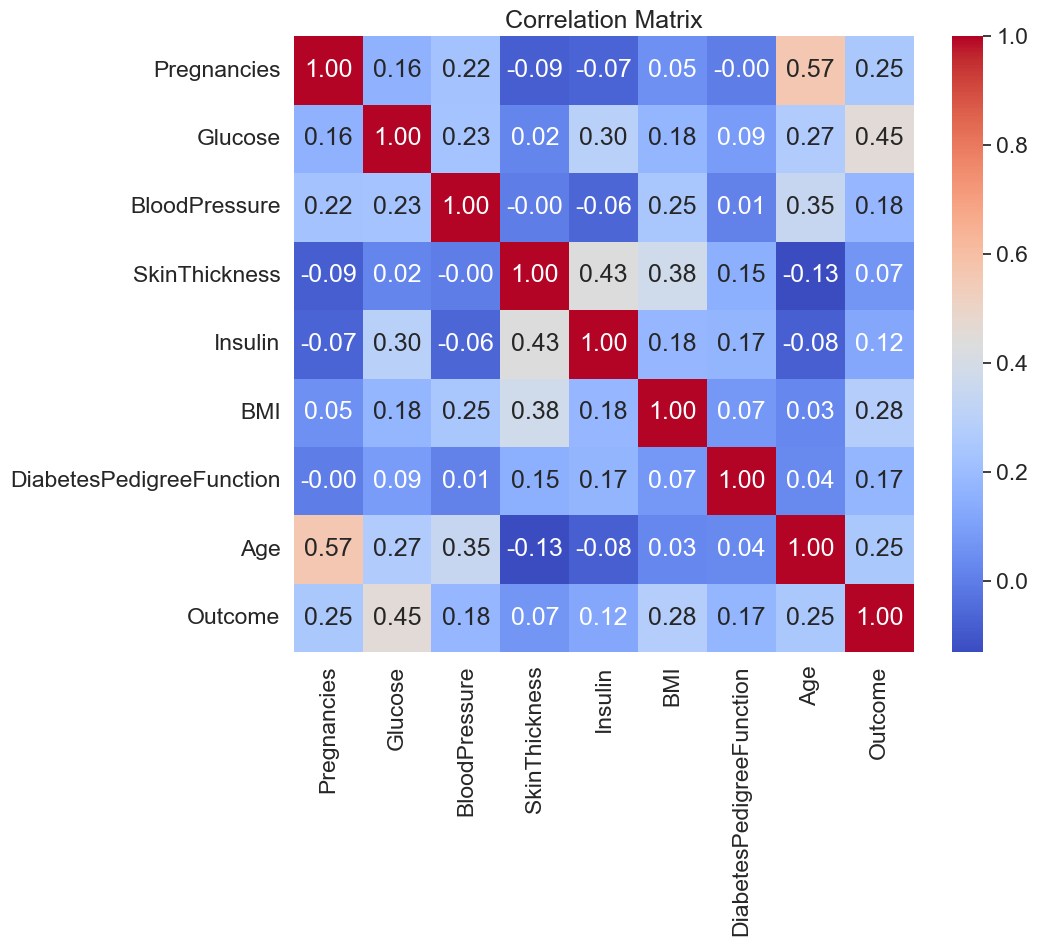

In [154]:
sns.heatmap(df.select_dtypes(include=np.number).corr(), # plot a correlation matrix 
            annot=True, # show the correlation values on the plot
            fmt=".2f", # set the format of the correlation values to be two decimal places
            cmap='coolwarm') # set the color palette to be coolwarm (blue for negative correlations, red for positive correlations)

plt.title('Correlation Matrix') # add a title

The independent variable (x) was defined as: 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age';
The dependent variable (y) as'Outcome'.

A heat map of the correlation matrix was drawn to show the correlation between the variables in preparation for the regression analysis. The strength of correlation between different features is differentiated by color in order to understand the relationship between the variables more visually. As can be seen from the image, the variables Pregnancies, BIM and Age are more correlated.

### Methodology

#### Multiple Linear Regression

In [155]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [156]:
df_drop = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
df_VIF = drop_column_using_vif_(df_drop, thresh=5)

Before doing the multiple linear regression analysis, the VIF values are calculated to detect multicollinearity among the features, and then the features with high VIF values are gradually deleted until the VIF values of all the features are below the specified thresholds to avoid causing multicollinearity and to improve the stability and interpretability of the regression model. The results show that no variable has a VIF value >5 and no variable is excluded.

In [157]:
import statsmodels.api as sm

X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df[['Outcome']]

X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()
# and print a summary of the results:
print(model.summary())

def backward_regression(X, y,
                        initial_list=[], 
                        threshold_out = 0.05, 
                        verbose=True):
    included = list(X.columns if initial_list == [] else initial_list)
    while True:
        changed=False
        print(included)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # 使用所有的 p-values 来进行比较并删除最高的
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # 获取最大的p-value
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included, model

result, model = backward_regression(X, y)
print('resulting features:')
print(result)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     37.63
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           6.70e-50
Time:                        10:08:22   Log-Likelihood:                -353.03
No. Observations:                 718   AIC:                             724.1
Df Residuals:                     709   BIC:                             765.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [158]:
df = df.dropna()
X = df[['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']]
X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()
# and print a summary of the results:
print(model.summary())
print() # blank line

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     74.27
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           1.25e-52
Time:                        10:08:26   Log-Likelihood:                -355.03
No. Observations:                 718   AIC:                             720.1
Df Residuals:                     713   BIC:                             742.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [159]:
r_squared = model.rsquared
print("R-squared:", r_squared)

R-squared: 0.29411984253765766


Since the VIF values do not exclude variables and still leave 8 independent variables, backward stepwise regression is used in order to avoid the introduction of too many features, reduce the complexity of the model, and reduce the risk of overfitting. Starting with the 8 variables of the full model, variables that contributed less to the model were gradually removed to obtain a more simplified model. The final list of independent variables was：'Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction'
The OLS regression results show that the p-values for 'Pregnancies', 'Glucose', 'BMI' and 'DiabetesPedigreeFunction' are less than 0.05, indicating that all four variables are significantly related to the dependent variable. However, the R-squared of the model was 0.29, indicating that the model could explain only about 29% of the dependent variable. The performance of the multiple linear regression model is less than satisfactory and other models may need to be tried.

#### Classification Model

By looking at the data again as well as analyzing the results of the multiple regression, it is evident that many of the variables in the data are categorical. This also results in a very small R² for the multiple linear regression model, as the linear regression model assumes that the relationship between the independent variables and the dependent variable is linear, whereas categorical variables are usually not directly usable for linear regression, and their values are usually not continuous.

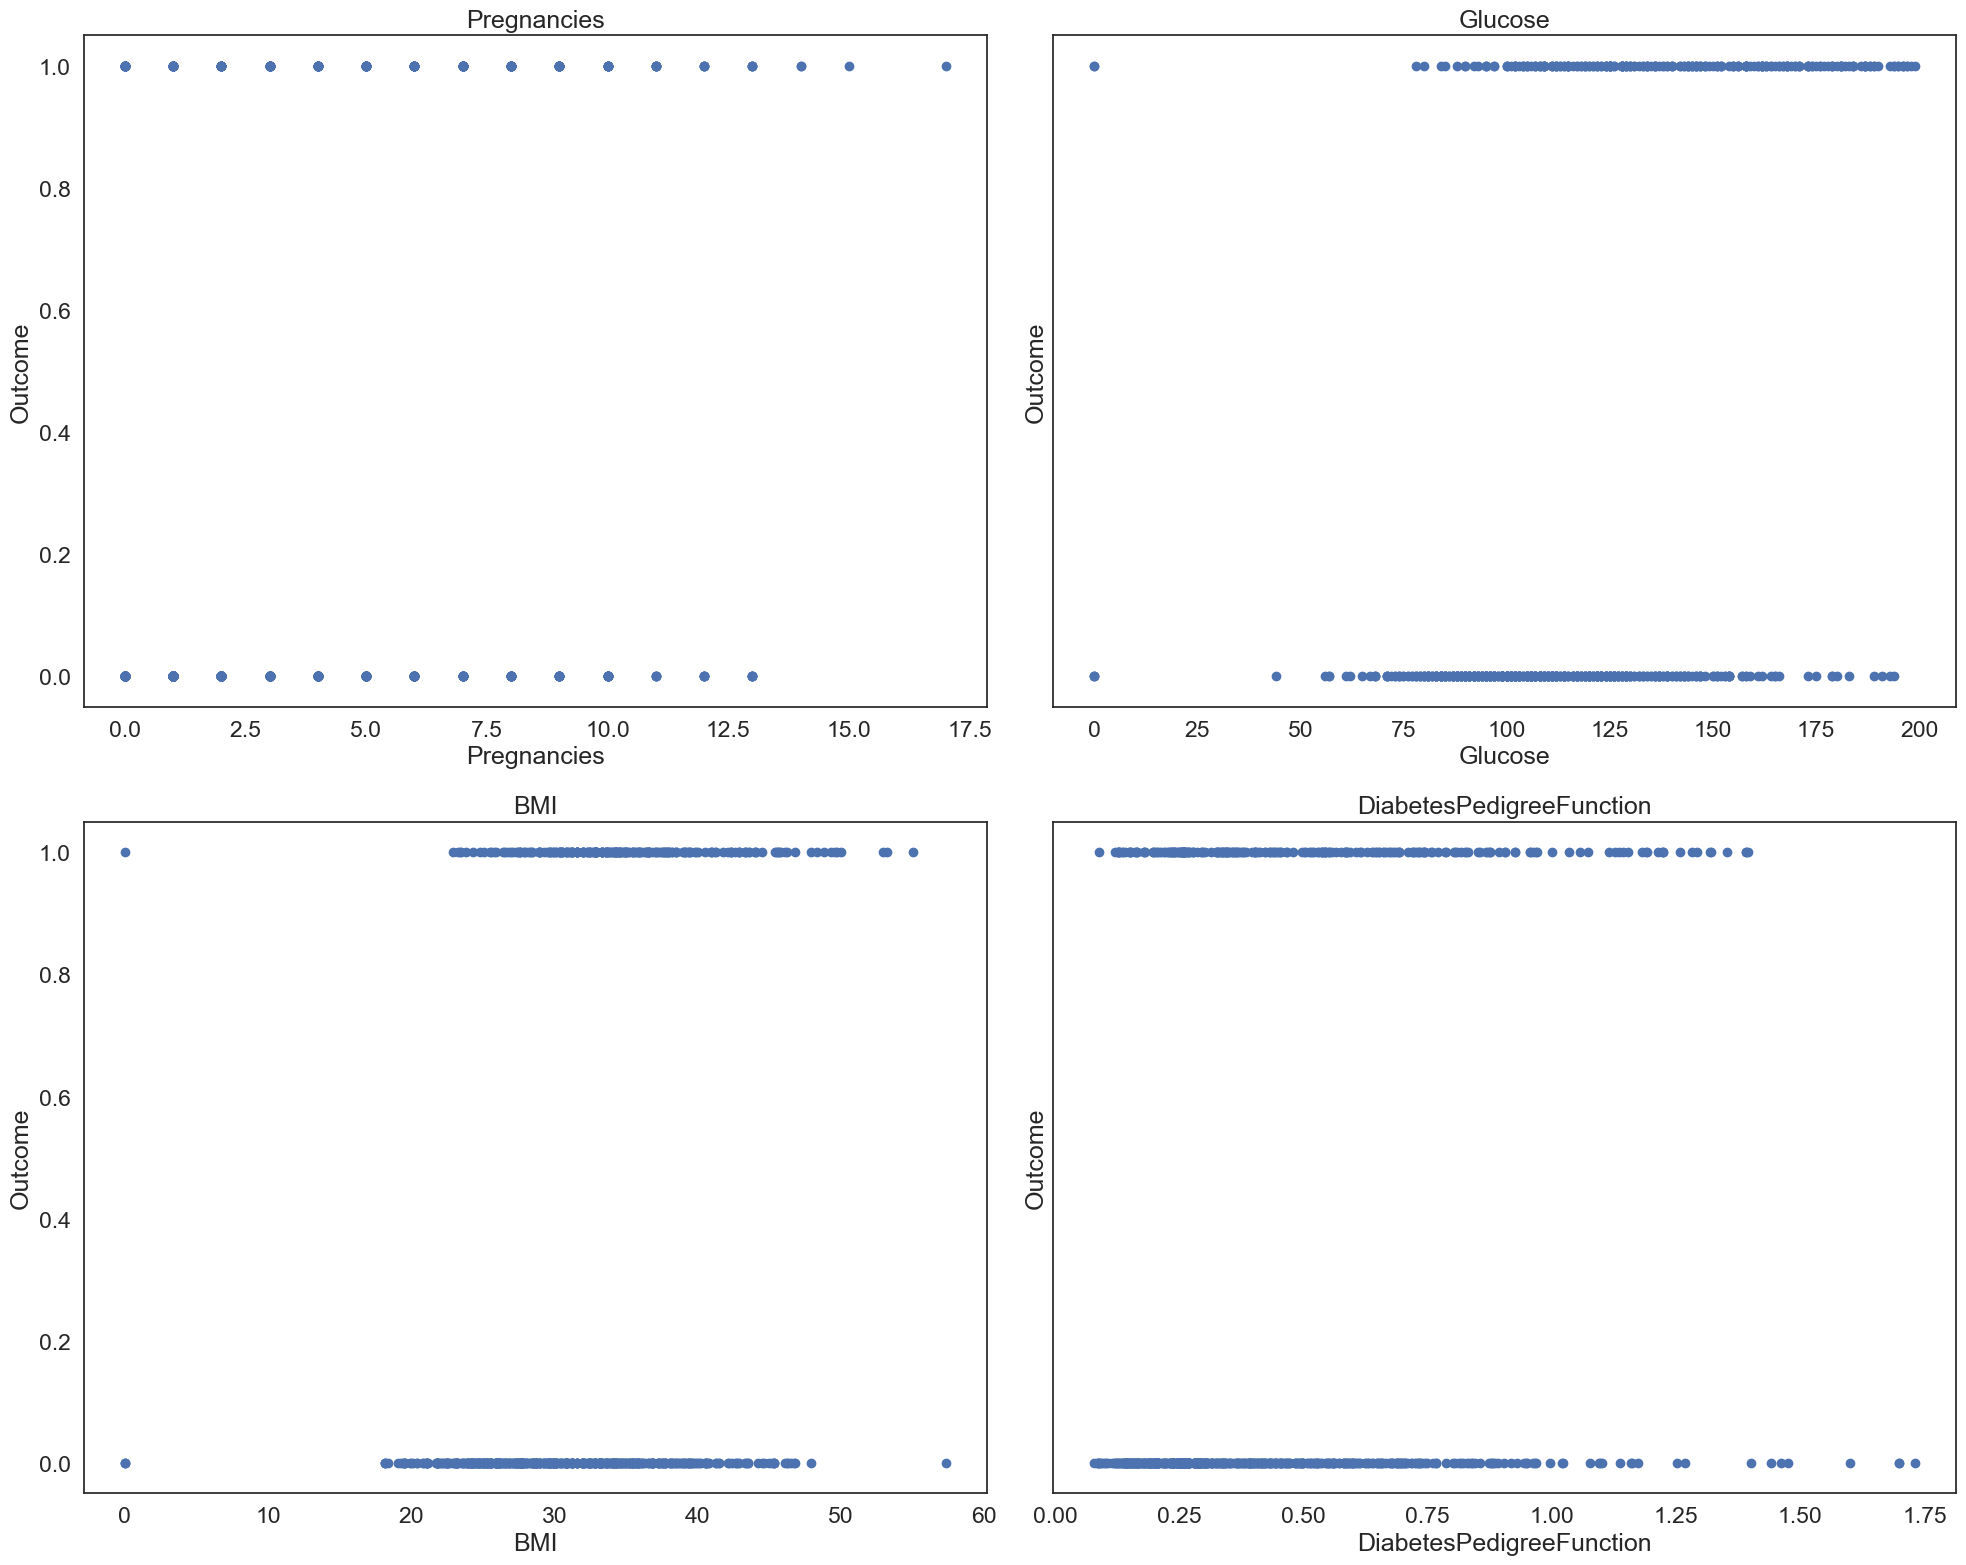

In [160]:
fig, axes = plt.subplots(2, 2, sharey=True, figsize=(20, 16))

# Draw a scatter plot
for i, ax in enumerate(axes.flatten()):
    ax.scatter(X.iloc[:, i], y)
    ax.set_title(X.columns[i])
    ax.set_xlabel(X.columns[i])
    ax.set_ylabel('Outcome')

plt.tight_layout()
plt.show()

The scatterplot shows that the variable Pregnancies, Glucose, BIM and DiabetesPedigreeFunction are not linear with the dependent variable. In this case, it may be more appropriate to use a categorical model, especially if the dependent variable is a dichotomous categorical variable. Categorical models are better able to capture the complex relationship between categorical variables and the dependent variable without assuming a linear relationship.

##### Converting categorical variables

Most classification models (such as logistic regression and decision trees, etc.) usually require that the input features are numerical rather than categorical. Therefore, before using a classification model, it is necessary to identify and transform the categorical variables in the data set.
First manually classify several categorical variables.

In [175]:
NewBMI = pd.Series(["Underweight","Normal", "Overweight","Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

In [176]:
NewBMI

0    Underweight
1         Normal
2     Overweight
3      Obesity 1
4      Obesity 2
5      Obesity 3
dtype: category
Categories (6, object): ['Normal', 'Obesity 1', 'Obesity 2', 'Obesity 3', 'Overweight', 'Underweight']

In [177]:
df['NewBMI'] = NewBMI
df.loc[df["BMI"]<18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"]>18.5) & df["BMI"]<=24.9, "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"]>24.9) & df["BMI"]<=29.9, "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"]>29.9) & df["BMI"]<=34.9, "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"]>34.9) & df["BMI"]<=39.9, "NewBMI"] = NewBMI[4]
df.loc[df["BMI"]>39.9, "NewBMI"] = NewBMI[5]

In [178]:
# if insulin>=16 & insuline<=166->normal
def set_insuline(row):
    if row["Insulin"]>=16 and row["Insulin"]<=166:
        return "Normal"
    else:
        return "Abnormal"

In [179]:
df = df.assign(NewInsulinScore=df.apply(set_insuline, axis=1))

In [180]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [181]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,...,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret,NewBMI,NewInsulinScore,NewGlucose
0,6,148,72.0,35,0.0,33.6,0.627,50,1,False,...,False,False,False,False,False,False,True,Obesity 2,Abnormal,Secret
1,1,85,66.0,29,0.0,26.6,0.351,31,0,False,...,False,False,False,False,True,False,False,Obesity 2,Abnormal,Normal
2,8,183,64.0,0,0.0,23.3,0.672,32,1,False,...,False,False,False,False,False,False,True,Obesity 2,Abnormal,Secret
3,1,89,66.0,23,94.0,28.1,0.167,21,0,False,...,False,False,True,False,True,False,False,Obesity 2,Normal,Normal
5,5,116,74.0,0,0.0,25.6,0.201,30,0,False,...,False,False,False,False,False,True,False,Obesity 2,Abnormal,Overweight


After manually classifying the four categorical variables, perform One-Hot encoding on them, convert the categorical variables into numerical dummy variables, and add the results to the original data frame df. The result after coding is to transform each category of each categorical variable into a new binary variable (0 or 1) that represents whether it belongs to that category.

In [182]:
# One hot encoding
df = pd.get_dummies(df, columns = ["NewBMI", "NewInsulinScore", "NewGlucose"], drop_first=True)

In [183]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,...,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6,148,72.0,35,0.0,33.6,0.627,50,1,False,...,False,True,False,False,False,False,False,False,False,True
1,1,85,66.0,29,0.0,26.6,0.351,31,0,False,...,False,True,False,False,False,False,False,True,False,False
2,8,183,64.0,0,0.0,23.3,0.672,32,1,False,...,False,True,False,False,False,False,False,False,False,True
3,1,89,66.0,23,94.0,28.1,0.167,21,0,False,...,False,True,False,False,False,True,False,True,False,False
5,5,116,74.0,0,0.0,25.6,0.201,30,0,False,...,False,True,False,False,False,False,False,False,True,False


In [184]:
categorical_df = df[['NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [185]:
y=df['Outcome']
X=df.drop(['Outcome','NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis=1)

In [186]:
cols = X.columns
index = X.index

Divide the data set into two parts: one is the data frame categorical_df containing the dummy variable columns of the categorical variables after One-Hot encoding, and the other is the data frame X containing the remaining feature columns, and extract the dependent variable y , as well as the column name and index of the independent variable X.

In [187]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X=transformer.transform(X)
X=pd.DataFrame(X, columns = cols, index = index)

In [188]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.800,0.000,0.37500,-0.344423,0.176796,0.680189,1.235294
1,-0.4,-0.775,-0.375,0.18750,-0.344423,-0.596685,-0.066261,0.117647
2,1.0,1.675,-0.500,-0.71875,-0.344423,-0.961326,0.801893,0.176471
3,-0.4,-0.675,-0.375,0.00000,0.391389,-0.430939,-0.563895,-0.470588
5,0.4,0.000,0.125,-0.71875,-0.344423,-0.707182,-0.471941,0.058824


In [189]:
X = pd.concat([X, categorical_df], axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 1,...,NewInsulinScore_Normal,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Overweight,NewGlucose_Secret,NewGlucose_Secret
0,0.6,0.800,0.000,0.37500,-0.344423,0.176796,0.680189,1.235294,False,False,...,False,False,False,False,False,False,False,False,True,True
1,-0.4,-0.775,-0.375,0.18750,-0.344423,-0.596685,-0.066261,0.117647,False,False,...,False,False,False,False,True,True,False,False,False,False
2,1.0,1.675,-0.500,-0.71875,-0.344423,-0.961326,0.801893,0.176471,False,False,...,False,False,False,False,False,False,False,False,True,True
3,-0.4,-0.675,-0.375,0.00000,0.391389,-0.430939,-0.563895,-0.470588,False,False,...,True,True,False,False,True,True,False,False,False,False
5,0.4,0.000,0.125,-0.71875,-0.344423,-0.707182,-0.471941,0.058824,False,False,...,False,False,False,False,False,False,True,True,False,False


Perform Robust standardization on the feature data, and then merge the standardized feature data with the dummy variable columns of the One-Hot encoded categorical variables to obtain the final feature matrix X used for modeling.

##### Classification Model

Split the feature matrix into training and test sets, and normalize the data for use in machine learning models. During the normalization process, statistics from the training set are used to ensure the consistency of the data.

In [190]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [191]:
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression

In [202]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [203]:
y_pred = log_reg.predict(X_test)

In [204]:
accuracy_score(y_test, log_reg.predict(X_test))

0.8194444444444444

In [205]:
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))

In [206]:
confusion_matrix(y_test, y_pred)

array([[86, 10],
       [16, 32]], dtype=int64)

In [207]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        96
           1       0.76      0.67      0.71        48

    accuracy                           0.82       144
   macro avg       0.80      0.78      0.79       144
weighted avg       0.82      0.82      0.82       144



Use a logistic regression model to train and predict on the data, and evaluate the model's performance on the test set.
The classification report provides a detailed evaluation of model performance, including accuracy, precision, recall, F1-score and other indicators.

- Accuracy: The proportion of the number of samples correctly predicted by the model to the total number of samples. In this report, the model achieved an accuracy of 80% on the test set.
- Precision: The proportion of samples predicted as positive categories by the model that are correctly predicted. In this report, for the positive category (1), the precision is 0.68, i.e., 68% of the samples predicted by the model to be diabetic were actually diabetic.
- Recall: The proportion of all real positive category samples that the model correctly predicts as a positive category. In this report, for the positive category (1), the recall rate is 0.64, i.e. the model successfully captured 64% of true diabetic patients.
- F1 value (F1-score): the harmonic average of precision and recall, used to comprehensively evaluate the performance of the model. The F1 value strikes a balance between precision and recall, and when the difference between precision and recall is large, the F1 value is lower. In this report, the F1 value for the positive category (1) is 0.66.

Taken together, the model performs better on the negative category (0), but performs relatively poorly on the positive category (1), with an accuracy of 80%.

Decision Tree Classifier

In [208]:
# Decision Tree
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))

print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
0.7638888888888888
[[80 16]
 [18 30]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82        96
           1       0.65      0.62      0.64        48

    accuracy                           0.76       144
   macro avg       0.73      0.73      0.73       144
weighted avg       0.76      0.76      0.76       144



In [209]:
# hyperparameter tuning of dt
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth' :  [3,5,7,10],
    'splitter' : ['best','radom'],
    'min_samples_leaf':[1,2,3,5,7], 
    'min_samples_split':[1,2,3,5,7], 
    'max_features':['auto','sqrt','log2']
}
grid_search_dt = GridSearchCV(DT, grid_param, cv=50, n_jobs=-1, verbose = 1)
grid_search_dt.fit(X_train, y_train)

Fitting 50 folds for each of 1200 candidates, totalling 60000 fits


GridSearchCV(cv=50, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'radom']},
             verbose=1)

In [210]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 7,
 'min_samples_split': 5,
 'splitter': 'best'}

In [211]:
grid_search_dt.best_score_

0.7504545454545456

In [212]:
DT = grid_search_dt.best_estimator_
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))
dt_acc = accuracy_score(y_test, DT.predict(X_test))
print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7735191637630662
0.7430555555555556
[[84 12]
 [25 23]]
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        96
           1       0.66      0.48      0.55        48

    accuracy                           0.74       144
   macro avg       0.71      0.68      0.69       144
weighted avg       0.73      0.74      0.73       144



Create a Decision Tree Classifier and train it, then evaluate the model performance on the training and test sets.
Hyperparameter tuning of the decision tree classifier was performed using Grid Search (GridSearchCV) to further improve model performance.
According to the classification report:

- Accuracy: The accuracy of the model on the test set is 77.9%. This represents the proportion of samples correctly predicted by the model to the total number of samples.
- Precision: Among the samples predicted to be in the positive category (diabetics), the model correctly predicted 64% of the time.
- Recall: The model successfully captured 64% of all true positive class (diabetic patients) samples.
- F1-score: In this report, the F1-score for the positive category (diabetics) is 0.64.

Taken together, the model's performance in predicting diabetic patients is average, with its accuracy, precision and recall rates all reaching about 64%. This indicates that the model has certain limitations in identifying patients with diabetes and may need further improvement or tuning.

Random Forest Classifier

In [213]:
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [214]:
y_pred = rand_clf.predict(X_test)

In [215]:
y_pred = rand_clf.predict(X_test)
print(accuracy_score(y_train, rand_clf.predict(X_train)))
rand_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(accuracy_score(y_test, rand_clf.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9912891986062717
0.8055555555555556
[[84 12]
 [16 32]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        96
           1       0.73      0.67      0.70        48

    accuracy                           0.81       144
   macro avg       0.78      0.77      0.78       144
weighted avg       0.80      0.81      0.80       144



Use a random forest classifier to train and predict on the data, and evaluate the model's performance on the test set.
According to the classification report:

- Accuracy: The accuracy of the model on the test set is 81.2%. This represents the proportion of samples correctly predicted by the model to the total number of samples.
- Precision: Among the samples predicted to be in the positive category (diabetic patients), the model correctly predicted 69% of the time.
- Recall: The model successfully captures 70% of all true positive class (diabetic patients) samples.
- F1-score: In this report, the F1-score for the positive category (diabetics) is 0.69.

Taken together, the random forest model performed well in predicting diabetic patients, with accuracy, precision, and recall all reaching about 69% to 70%. Overall, the model has good performance in diabetes prediction tasks.

### Results and Discussion

In [216]:
# Model Comparison
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Score': [100*round(log_reg_acc,4), 100*round(dt_acc,4), 100*round(rand_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistic Regression,81.94
2,Random Forest Classifier,80.56
1,Decision Tree Classifier,74.31


Create a DataFrame containing the three models and their performance scores, and sort the DataFrame in descending order by score to compare the performance of the three models.Based on the model scores, the random forest classifier obtained the highest accuracy (81.17%) on the test set, followed by the logistic regression model (79.87%), and the decision tree classifier obtained the lowest accuracy (77.92%). This shows that on the given data set, the random forest model performs best in predicting patients with diabetes.

The random forest model has higher accuracy than logistic regression and decision tree models. This may be attributed to its ensemble learning characteristics, which can effectively combine multiple decision tree models, reduce the risk of overfitting, and have Better generalization ability. The logistic regression model performs slightly worse, probably because it assumes a linear relationship and does not work well when dealing with complex nonlinear data. Although the decision tree model has high interpretability, it is prone to overfitting when dealing with complex data.

### Conclusion 
In summary, our study provides insight into the predictive power of logistic regression, decision tree classification, and random forest classification models in identifying diabetes risk factors. We initially attempted a multiple linear regression approach but found that the model fit was poor due to the categorical nature of many variables, and the dependent variable was not linearly related to the independent variables. Subsequently, we explored classification models to overcome this limitation. Our comparative analysis shows that the random forest classification model exhibits the highest accuracy among the three models, achieving an accuracy of 81.17%. This shows that random forest classification is expected to be an effective tool for diabetes prediction. However, further research is needed to assess the robustness and generalizability of the model, given potential changes in data characteristics and demographics. Overall, our findings could help advance public health initiatives by leveraging machine learning techniques for early detection and management of diabetes.

### Reference
Alehegn, M., Joshi, R. R., & Mulay, P. (2019). Diabetes analysis and prediction using random forest, KNN, Naïve Bayes, and J48: an ensemble approach. Int. J. Sci. Technol. Res, 8(9), 1346-1354.

Daghistani, T., & Alshammari, R. (2020). Comparison of statistical logistic regression and random forest machine learning techniques in predicting diabetes. Journal of Advances in Information Technology Vol, 11(2), 78-83.

Palimkar, P., Shaw, R. N., & Ghosh, A. (2022). Machine learning technique to prognosis diabetes disease: Random forest classifier approach. In Advanced Computing and Intelligent Technologies: Proceedings of ICACIT 2021 (pp. 219-244). Springer Singapore.

Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

Xu, W., Zhang, J., Zhang, Q., & Wei, X. (2017, February). Risk prediction of type II diabetes based on random forest model. In 2017 third international conference on advances in electrical, electronics, information, communication and bio-informatics (AEEICB) (pp. 382-386). IEEE.